In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from class_features import Features
from class_models import Logit, Gdbr, NaiveBayes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from bs4 import BeautifulSoup 
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import itertools
from itertools import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_json('data/data.json',convert_dates=['approx_payout_date','event_created',
                                                'event_published','event_start',
                                                'event_end','user_created'])

#Features
features = Features()
X, y = features.features_clean(df)

In [3]:
#Checking correlations
data = X.copy()
data['fraud'] = y
data.corr()

,body_length,name_length,sale_duration,user_age,fb_published,has_logo,org_facebook,org_twitter,avg_ticket_cost,tot_ticket_quant,GBP,USD,deliv_method_1.0,payout_type_cash,payout_type_check,fraud
body_length,1.000000,0.152534,0.081269,0.117866,0.040859,0.059343,0.036036,0.060555,0.031678,0.000680,0.018581,-0.035182,0.154459,0.014631,0.013210,-0.118308
name_length,0.152534,1.000000,0.062723,0.133011,0.081675,0.110060,0.047541,0.072947,0.033017,0.094962,-0.030948,0.013614,0.112612,0.007725,0.035104,-0.158447
sale_duration,0.081269,0.062723,1.000000,0.029420,0.034230,0.047850,0.061530,0.065355,0.063000,0.062388,0.039366,-0.052204,0.200090,-0.014088,0.041798,-0.171813
user_age,0.117866,0.133011,0.029420,1.000000,0.030669,0.024572,0.035883,0.105830,-0.003483,-0.012727,-0.010042,0.039376,0.159673,-0.038704,0.088465,-0.215929
fb_published,0.040859,0.081675,0.034230,0.030669,1.000000,0.048474,0.077610,0.067521,-0.017226,-0.006445,-0.020898,0.028350,0.070091,0.018597,0.008067,-0.099143
has_logo,0.059343,0.110060,0.047850,0.024572,0.048474,1.000000,0.095367,0.101030,-0.009105,0.006728,0.038522,-0.075577,0.045172,0.036506,0.013284,-0.169485
org_facebook,0.036036,0.047541,0.061530,0.035883,0.077610,0.095367,1.000000,0.514731,-0.038922,-0.009508,-0.014313,-0.042221,0.076550,0.049862,-0.015750,-0.178223
org_twitter,0.060555,0.072947,0.065355,0.105830,0.067521,0.101030,0.514731,1.000000,-0.024051,-0.009463,0.078549,-0.108812,0.110538,0.080898,-0.045103,-0.201654
avg_ticket_cost,0.031678,0.033017,0.063000,-0.003483,-0.017226,-0.009105,-0.038922,-0.024051,1.000000,0.001136,-0.044857,0.024522,0.030365,-0.003136,-0.005141,0.067944
tot_ticket_quant,0.000680,0.094962,0.062388,-0.012727,-0.006445,0.006728,-0.009508,-0.009463,0.001136,1.000000,-0.008303,-0.007055,0.020321,-0.026078,-0.006449,0.045722


In [4]:
#Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
## =============================================================================
## Logistic regression
## =============================================================================

logit = Logit(X_train,y_train.values.ravel())
logit=logit.fit()
y_test_predicted = logit.predict(X_test)
logit.score(X_test,y_test)

0.9511854951185496

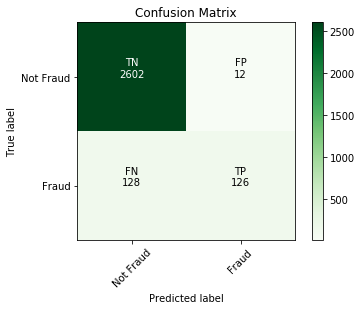

In [6]:
logit.confusion_matrix_plot(y_test, y_test_predicted, cmap = plt.cm.Greens)

In [7]:
logit.model_summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                11469
Model:                          Logit   Df Residuals:                    11453
Method:                           MLE   Df Model:                           15
Date:                Sun, 24 Mar 2019   Pseudo R-squ.:                     inf
Time:                        17:30:00   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1445      0.405     15.159      0.000       5.350       6.939
body_length       -7.887e-05   1.78e-05     -4.421      0.000      -0.000   -4.39e-05
name_length          -0.0123      0.003     -4.864      0.000      -0.017      -0.007
sale_duration        -0.0320      0.002    -13.440      0.000      -0.037      -0.027
user_age             -0.0032      0.000    -14.223      0.000      -0.004      -0.003
fb_published         -1.0226      0.250     -4.083      0.000      -1.513      -0.532
has_logo             -0.6301      0.111     -5.672      0.000      -0.848      -0.412
org_facebook         -0.0600      0.010     -5.780      0.000      -0.080      -0.040
org_twitter          -0.1680      0.021     -7.975      0.000      -0.209      -0.127
avg_ticket_cost       0.0006   7.72e-05      7.338      0.000       0.000       0.001
tot_ticket_quant   2.787e-06   4.83e-07      5.771      0.000    1.84e-06    3.73e-06
GBP                   1.8513      0.187      9.881      0.000       1.484       2.219
USD                   0.9760      0.169      5.782      0.000       0.645       1.307
deliv_method_1.0     -1.3524      0.165     -8.220      0.000      -1.675      -1.030
payout_type_cash     -6.2993      0.336    -18.743      0.000      -6.958      -5.641
payout_type_check    -8.1600      0.392    -20.833      0.000      -8.928      -7.392
=====================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [8]:
# =============================================================================
# Gradient Boosting Classifier
# =============================================================================

gdbr = Gdbr(X_train,y_train.values.ravel())
gdbr.fit()
y_test_predicted = gdbr.predict(X_test)
gdbr.score(X_test,y_test)

0.9801255230125523

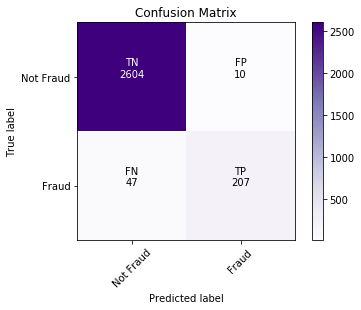

In [9]:
gdbr.confusion_matrix_plot(y_test, y_test_predicted, cmap = plt.cm.Purples)

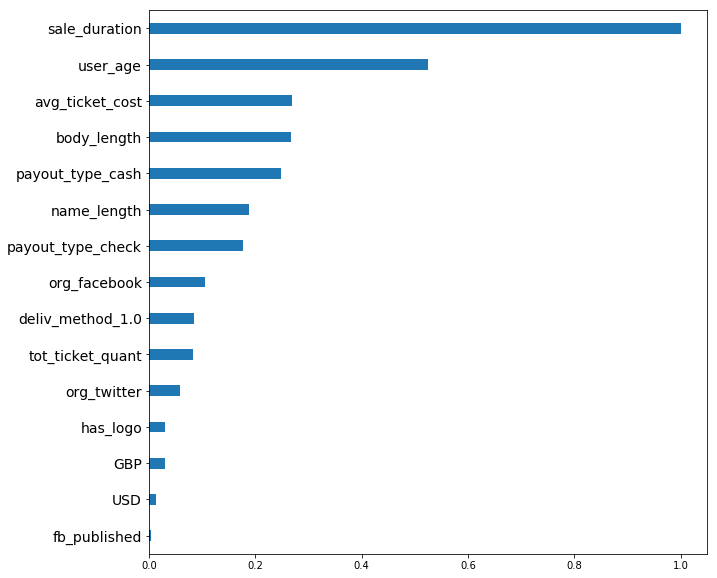

In [10]:
gdbr.feature_importances(X_train)

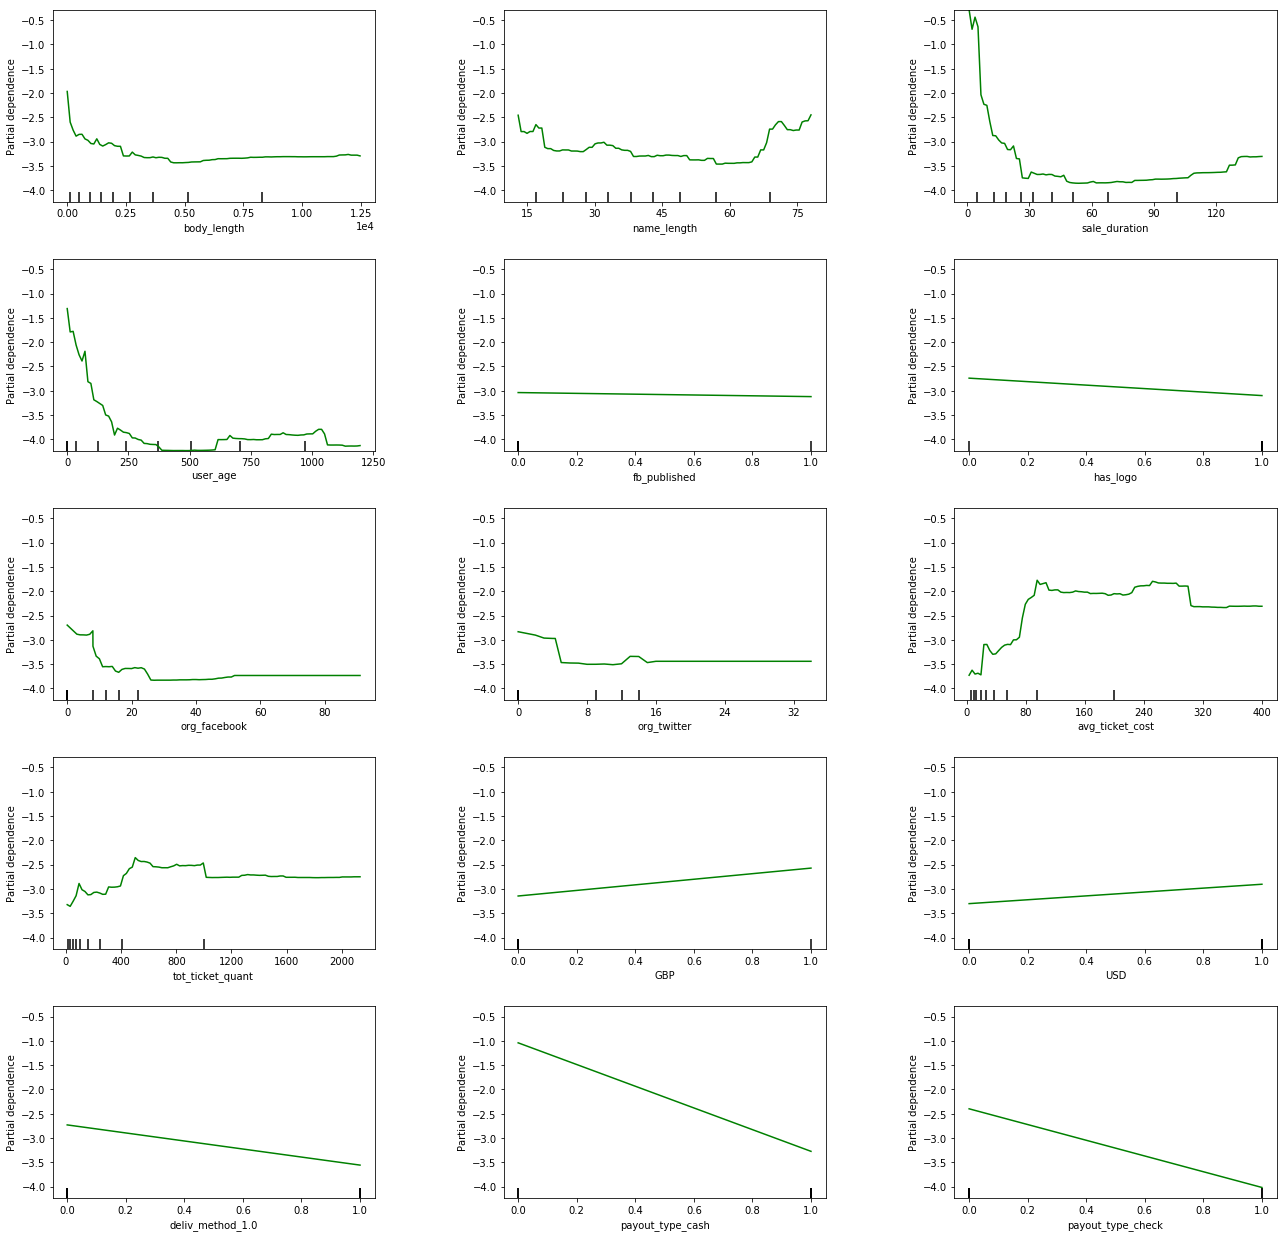

In [11]:
gdbr.partial_dependence_plots(X_train)

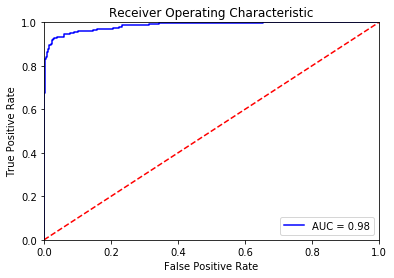

In [12]:
gdbr.plot_roc(X_test, y_test)

In [13]:
# =============================================================================
# Random Forest
# =============================================================================
rf = RandomForestClassifier(n_estimators=1000,
                            n_jobs=-1)

rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9780334728033473

In [14]:
# =============================================================================
# SVM
# =============================================================================

#Standardizing/Rescaling continuous variables
cont_vars=['body_length', 'name_length', 'sale_duration', 'user_age',
        'org_facebook','org_twitter', 'avg_ticket_cost','tot_ticket_quant']
X_train_svm = X_train.copy()
X_test_svm = X_test.copy()
X_train_svm[cont_vars]=StandardScaler().fit_transform(X_train_svm[cont_vars])
X_test_svm[cont_vars]=StandardScaler().fit_transform(X_test_svm[cont_vars])

svm = SVC(gamma='scale',probability=True) 
svm.fit(X_train_svm,y_train)
svm.score(X_test_svm,y_test)

0.9731520223152023

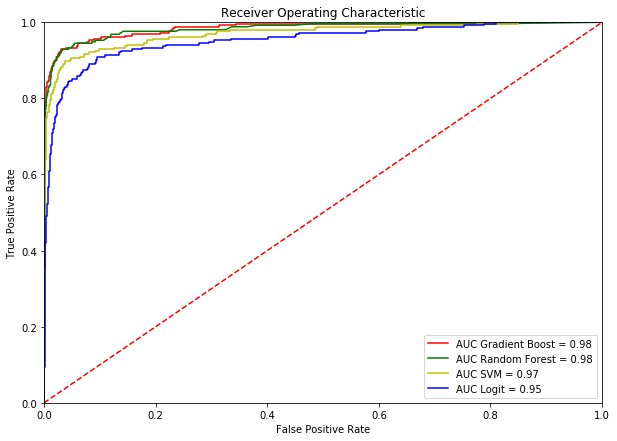

In [15]:
# =============================================================================
# ROC curve
# =============================================================================

#Logit
preds_logit = logit.predict_proba(X_test)[:,1]
fpr_logit, tpr_logit, threshold = metrics.roc_curve(y_test, preds_logit)
roc_auc_logit = metrics.auc(fpr_logit, tpr_logit)

#Gdbr
preds_gdbr = gdbr.predict_proba(X_test)[:,1]
fpr_gdbr, tpr_gdbr, threshold = metrics.roc_curve(y_test, preds_gdbr)
roc_auc_gdbr = metrics.auc(fpr_gdbr, tpr_gdbr)

#Random Forest
preds_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, threshold = metrics.roc_curve(y_test, preds_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

#SVM
preds_svm = svm.predict_proba(X_test_svm)[:,1]
fpr_svm, tpr_svm, threshold = metrics.roc_curve(y_test, preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)

# method I: plt
fig = plt.figure(figsize=(10, 7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gdbr, tpr_gdbr, 'r', label = 'AUC Gradient Boost = %0.2f' % roc_auc_gdbr)
plt.plot(fpr_rf, tpr_rf, 'g', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, 'y', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, 'b', label = 'AUC Logit = %0.2f' % roc_auc_logit)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

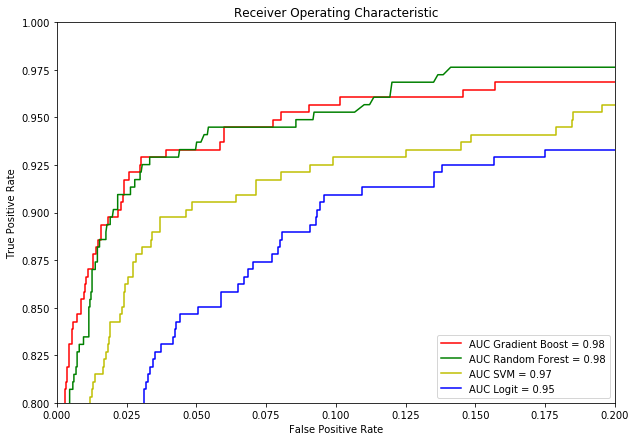

In [16]:
# Zoomed graph
fig = plt.figure(figsize=(10, 7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gdbr, tpr_gdbr, 'r', label = 'AUC Gradient Boost = %0.2f' % roc_auc_gdbr)
plt.plot(fpr_rf, tpr_rf, 'g', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, 'y', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, 'b', label = 'AUC Logit = %0.2f' % roc_auc_logit)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.show()

In [17]:
# =============================================================================
# Save Gradient Boosting Classifier pickle file
# =============================================================================

import pickle
if __name__ == '__main__':
    with open('model.pkl', 'wb') as f:
        pickle.dump(gdbr, f)

In [18]:
# =============================================================================
# Compare Gradient Boosting Classifier, Random Forest, SVM and Logit
# =============================================================================

import model_comparison
model_comparison.comparison()

Gradient Boosting accuracy score:  0.9801255230125523
Random Forest accuracy score:      0.9780334728033473
SVM accuracy score:                0.9731520223152023
Logit accuracy score:              0.9599023709902371
 
Gradient Boosting TN: 2604 FP: 10 FN: 47  TP: 207
Random Forest     TN: 2600 FP: 14 FN: 49  TP: 205
SVM               TN: 2597 FP: 17 FN: 60  TP: 194
Logit             TN: 2600 FP: 14 FN: 101 TP: 153
